In [1]:
import numpy as np
from keras import datasets ,models , layers
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt 
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loass')
    plt.xlabel('Epoch')
    plt.legend(['train','Test'],loc=0)

In [3]:
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('MOdel accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','Test'],loc=0)

In [4]:
(X_train, y_train),(X_test,y_test) = datasets.mnist.load_data()

In [5]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [6]:
print(X_train.shape)
L,W,H = X_train.shape
X_train = X_train.reshape(-1,W*H)
X_test = X_test.reshape(-1,W*H)

(60000, 28, 28)


In [7]:
print(X_train.shape)

(60000, 784)


In [8]:
X_train = X_train/ 255.0
Y_train = Y_train /255.0

In [9]:
Nin = 784
Nh = 100
number_of_class =10
Nout = number_of_class

class ANN(models.Sequential):
    def __init__(self,Nin,Nh ,Nout):
        super().__init__()
        self.add(layers.Dense(Nh,activation ='relu' ,input_shape =(Nin,)))
        self.add(layers.Dense(Nout, activation = 'softmax'))

model = ANN(Nin,Nh,Nout)

In [10]:
model.compile(optimizer='adam', loss ='categorical_crossentropy' ,metrics =['accuracy'])
history = model.fit(X_train, Y_train ,epochs=5, batch_size =100 , validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 98us/step - loss: 0.0016 - acc: 0.8878 - val_loss: 8.4026e-04 - val_acc: 0.9420
Epoch 2/5
48000/48000 [==============================] - 2s 52us/step - loss: 7.6731e-04 - acc: 0.9440 - val_loss: 6.6960e-04 - val_acc: 0.9522
Epoch 3/5
48000/48000 [==============================] - 3s 69us/step - loss: 5.6282e-04 - acc: 0.9585 - val_loss: 5.5047e-04 - val_acc: 0.9610
Epoch 4/5
48000/48000 [==============================] - 3s 55us/step - loss: 4.4426e-04 - acc: 0.9675 - val_loss: 4.8575e-04 - val_acc: 0.9646
Epoch 5/5
48000/48000 [==============================] - 3s 55us/step - loss: 3.6551e-04 - acc: 0.9740 - val_loss: 4.4190e-04 - val_acc: 0.9680


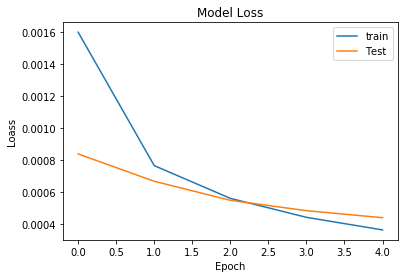

In [11]:
plot_loss(history)

In [12]:
print(X_test[0:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


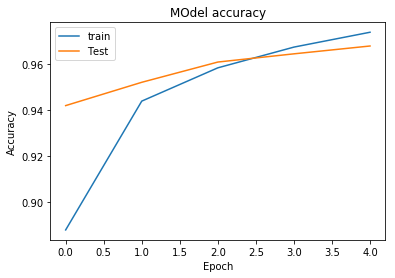

In [13]:
plot_acc(history)